# Flight Data Exploration
## by Anuja Jadhav

## Preliminary Wrangling

**Data Description**
Reporting carriers are required to (or voluntarily) report on-time data for flights they operate: on-time arrival and departure data for non-stop domestic flights by month and year, by carrier and by origin and destination airport. Includes scheduled and actual departure and arrival times, canceled and diverted flights and causes of delay and cancellation for US based carriers.

**Source**
https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?pn=1 

**TimeRange**
From Jan 2009 to Dec 2019

**Field Description**
<table align='left'>
<tr>
    <th>Field</th>
    <th>Description</th>
    <th>Type</th>
</tr>
<tr>
    <td>year</td>
    <td>Year of flight (YYYY)</td>
    <td>Qualitative</td>
</tr>
<tr>
    <td>month</td>
    <td>Month of flight (MM)</td>
    <td>Qualitative</td>
</tr>
<tr>
    <td>carrier</td>
    <td>Code commonly used to identify a carrier.</td>
    <td>Qualitative</td>
</tr>
<tr>
    <td>carrier_name</td>
    <td>Airline carrier name</td>
    <td>Qualitative</td>
</tr>
<tr>
    <td>airport</td>
    <td>A three character alpha-numeric code of an airport</td>
    <td>Qualitative</td>
</tr>
<tr>
    <td>airport_name</td>
    <td>Name of the airport</td>
    <td>Qualitative</td>
</tr>
    <tr>
    <td>arr_flights</td>
    <td>Total number of arriving flights in the observation</td>
    <td>Quantitative</td>
</tr>
    <tr>
    <td>arr_del15</td>
    <td>Total number of delayed flights in the observation </td>
    <td>Quantitative</td>
</tr>
    <tr>
    <td>carrier_ct</td>
    <td>Number of flights delayed due to air carrier</td>
    <td>Quantitative</td>
</tr>
    <tr>
    <td>weather_ct</td>
    <td>Number of flights delayed due to weather</td>
    <td>Quantitative</td>
</tr>
    <tr>
    <td>nas_ct</td>
    <td>Number of flights delayed due to National Air System Delay</td>
    <td>Quantitative</td>
</tr>    
    <tr>
    <td>security_ct</td>
    <td>Number of flights delayed due to security</td>
    <td>Quantitative</td>
</tr>
 <tr>
    <td>late_aircraft_ct</td>
    <td>Number of flights delayed due to late aircraft</td>
    <td>Quantitative</td>
</tr>
     <tr>
    <td>arr_cancelled</td>
    <td>Number of flights cancelled</td>
    <td>Quantitative</td>
</tr>
     <tr>
    <td>arr_diverted</td>
    <td>Number of flights diverted</td>
    <td>Quantitative</td>
</tr>
     <tr>
    <td>arr_delay</td>
    <td>Arrival delay in minutes</td>
    <td>Quantitative</td>
</tr>
     <tr>
    <td>carrier_delay</td>
    <td>Carrier Delay, in Minutes (Cause)  </td>
    <td>Quantitative</td>
</tr>
         <tr>
    <td>carrier_delay</td>
    <td>Carrier Delay, in Minutes (Cause)  </td>
    <td>Quantitative</td>
</tr>
         <tr>
    <td>weather_delay</td>
    <td>Weather Delay, in Minutes (Cause)  </td>
    <td>Quantitative</td>
</tr>
         <tr>
    <td>nas_delay</td>
    <td>National Air System Delay, in Minutes (Cause)  </td>
    <td>Quantitative</td>
</tr>
         <tr>
    <td>security_delay</td>
    <td>Security Delay, in Minutes (Cause)  </td>
    <td>Quantitative</td>
</tr>
          <tr>
    <td>late_aircraft_delay</td>
    <td>Late Aircraft Delay, in Minutes Cause)</td>
    <td>Quantitative</td>
</tr>
</table>  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib.collections import QuadMesh
from matplotlib.text import Text

%matplotlib inline

### Data Wrangling

In [2]:
#Load CSV flights dataset
original_flights = pd.read_csv('airline_delay_causes.csv')

#### Assessment

In [304]:
#Visually asses Data
original_flights.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2009,11,AS,Alaska Airlines Inc.,BRW,"Barrow, AK: Wiley Post/Will Rogers Memorial",65.0,14.0,3.61,1.06,...,6.19,0.0,1.0,920.0,592.0,34.0,78.0,0.0,216.0,NaN
1,2009,11,AS,Alaska Airlines Inc.,BUR,"Burbank, CA: Bob Hope",85.0,5.0,1.00,0.00,...,0.98,0.0,0.0,134.0,25.0,0.0,70.0,0.0,39.0,NaN
2,2009,11,AS,Alaska Airlines Inc.,CDV,"Cordova, AK: Merle K Mudhole Smith",58.0,8.0,2.04,1.00,...,2.96,4.0,2.0,586.0,174.0,37.0,62.0,0.0,313.0,NaN
3,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.00,...,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0,NaN
4,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.00,...,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0,NaN


In [306]:
original_flights.shape

(174743, 22)

There are 174743 entries and 22 columns.

In [310]:
print('Carriers = ',original_flights['carrier'].nunique())
print('Airports = ',original_flights['airport'].nunique())

Carriers =  23
Airports =  385


There are 23 unique carriers and 385 airports 

In [311]:
#check random sample of 5 entries in the dataframe
original_flights.sample(5).T

,40351,138554,170309,164198,166146
year,2019,2009,2018,2016,2018
month,4,10,10,10,8
carrier,OO,DL,YX,AA,B6
carrier_name,SkyWest Airlines Inc.,Delta Air Lines Inc.,Republic Airline,American Airlines Inc.,JetBlue Airways
airport,ITH,PIT,LEX,SEA,ORD
airport_name,"Ithaca/Cortland, NY: Ithaca Tompkins Regional","Pittsburgh, PA: Pittsburgh International","Lexington, KY: Blue Grass","Seattle, WA: Seattle/Tacoma International","Chicago, IL: Chicago O'Hare International"
arr_flights,77,264,54,664,258
arr_del15,15,38,10,166,94
carrier_ct,7.64,19.42,1.95,53.45,28.1
weather_ct,3.65,1.54,0,1.95,0.34


In [312]:
#check for duplicate rows
original_flights.duplicated().sum()

0

**Quality** 
1. Error colum Unnamed: 21 in the end of the dataset


In [313]:
original_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174743 entries, 0 to 174742
Data columns (total 22 columns):
year                   174743 non-null int64
 month                 174743 non-null int64
carrier                174743 non-null object
carrier_name           174743 non-null object
airport                174743 non-null object
airport_name           174743 non-null object
arr_flights            174537 non-null float64
arr_del15              174498 non-null float64
carrier_ct             174537 non-null float64
 weather_ct            174537 non-null float64
nas_ct                 174537 non-null float64
security_ct            174537 non-null float64
late_aircraft_ct       174537 non-null float64
arr_cancelled          174537 non-null float64
arr_diverted           174537 non-null float64
 arr_delay             174537 non-null float64
 carrier_delay         174537 non-null float64
weather_delay          174537 non-null float64
nas_delay              174537 non-null float64
secu

**Quality** 
2. Datatype of month and year is integer instead of datetime
3. Whitespaces before some column names
4. Drop the rows with NA values

In [314]:
original_flights.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,174743.000000,174743.000000,174537.000000,174498.000000,174537.000000,174537.000000,174537.000000,174537.000000,174537.000000,174537.000000,174537.000000,174537.000000,174537.000000,174537.000000,174537.000000,174537.000000,174537.000000,0.0
mean,2014.061902,6.515088,395.438096,73.508705,20.864536,2.270695,23.264847,0.139633,26.952633,6.362061,0.942906,4365.029902,1333.422180,203.877946,1077.526862,5.882632,1744.319170,NaN
std,3.348265,3.451507,1044.862058,190.142838,45.415928,7.057443,72.738551,0.586353,77.534033,26.821657,3.973289,12347.478417,3514.766563,722.686157,3963.018781,31.486144,5138.224637,NaN
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2011.000000,4.000000,58.000000,9.000000,3.000000,0.000000,1.870000,0.000000,2.070000,0.000000,0.000000,454.000000,149.000000,0.000000,62.000000,0.000000,112.000000,NaN
50%,2014.000000,7.000000,120.000000,22.000000,7.830000,0.470000,5.430000,0.000000,6.690000,1.000000,0.000000,1216.000000,436.000000,21.000000,201.000000,0.000000,412.000000,NaN
75%,2017.000000,10.000000,283.000000,55.000000,19.010000,1.910000,14.850000,0.000000,18.270000,4.000000,1.000000,3158.000000,1132.000000,147.000000,585.000000,0.000000,1206.000000,NaN
max,2019.000000,12.000000,21977.000000,5268.000000,1242.160000,298.620000,2401.790000,19.530000,1885.470000,1389.000000,256.000000,429194.000000,196944.000000,31960.000000,137443.000000,3194.000000,148181.000000,NaN


**Quality** 
5. *_ct columns are number of times a delay is caused by a particular cause. However, it is in float. This needs to made a whole numer
6. Sometimes the ar_del15 sum is not equal to the values in *_ct column. This needs to be fixed.
7. arr_flights,arr_cancelled,arr_diverted and arr_del15 should be int and not float

In [315]:
original_flights.groupby(['carrier','carrier_name']).carrier.count()

carrier  carrier_name                
9E       Endeavor Air Inc.                3054
         Pinnacle Airlines Inc.           3713
AA       American Airlines Inc.          11418
AS       Alaska Airlines Inc.             7789
B6       JetBlue Airways                  7504
CO       Continental Air Lines Inc.       2040
DL       Delta Air Lines Inc.            17374
EV       Atlantic Southeast Airlines      4084
         ExpressJet Airlines Inc.        13159
         ExpressJet Airlines LLC           850
F9       Frontier Airlines Inc.           7739
FL       AirTran Airways Corporation      3787
G4       Allegiant Air                    2837
HA       Hawaiian Airlines Inc.           2184
MQ       American Eagle Airlines Inc.     8065
         Envoy Air                        5799
NK       Spirit Air Lines                 2320
NW       Northwest Airlines Inc.           947
OH       Comair Inc.                      1738
         PSA Airlines Inc.                2230
OO       SkyWest Airli

**Quality**
8. From the above table it is clear, that carrier code is not unique to carrier name. So for our analysis we will use carrier name and drop carrier code. 

#### Cleaning

In [3]:
#Create a copy of the original data
df_flights = original_flights.copy()

In [5]:
df_flights.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2009,11,AS,Alaska Airlines Inc.,BRW,"Barrow, AK: Wiley Post/Will Rogers Memorial",65.0,14.0,3.61,1.06,...,6.19,0.0,1.0,920.0,592.0,34.0,78.0,0.0,216.0,NaN
1,2009,11,AS,Alaska Airlines Inc.,BUR,"Burbank, CA: Bob Hope",85.0,5.0,1.00,0.00,...,0.98,0.0,0.0,134.0,25.0,0.0,70.0,0.0,39.0,NaN
2,2009,11,AS,Alaska Airlines Inc.,CDV,"Cordova, AK: Merle K Mudhole Smith",58.0,8.0,2.04,1.00,...,2.96,4.0,2.0,586.0,174.0,37.0,62.0,0.0,313.0,NaN
3,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.00,...,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0,NaN
4,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.00,...,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0,NaN


##### Define
Drop the unnamed column

##### Code

In [4]:
#Drop the error column
df_flights.dropna(axis='columns',how='all',inplace=True)

##### Test

In [319]:
assert df_flights.isna().all().sum() == 0

##### Define
Drop rows with atleast one NA value

##### Code

In [5]:
df_flights.dropna(inplace=True,axis=0)

#### Test

In [321]:
assert df_flights.isna().any().sum() == 0

##### Define
Remove column name whitespace

##### Code

In [6]:
#Remove column name whitespace
df_flights.rename(columns=lambda x: x.strip(), inplace=True)

##### Test

In [323]:
list(df_flights.columns)

['year',
 'month',
 'carrier',
 'carrier_name',
 'airport',
 'airport_name',
 'arr_flights',
 'arr_del15',
 'carrier_ct',
 'weather_ct',
 'nas_ct',
 'security_ct',
 'late_aircraft_ct',
 'arr_cancelled',
 'arr_diverted',
 'arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

##### Define
Convert *_ct,arr_flights,arr_cancelled,arr_diverted and arr_del15 should be into whole numbers
<br>Match # of arrival delays to the sum of *_ct columns

##### Code

In [7]:
#Convert all *_ct columns,arr_flights,arr_cancelled,arr_diverted and arr_del15 to whole numbers instead of float

def convert_to_integer(column):
    df_flights[column]=df_flights[column].round(0).astype(int)
    
convert_to_integer('carrier_ct')
convert_to_integer('weather_ct')
convert_to_integer('nas_ct')
convert_to_integer('security_ct')
convert_to_integer('late_aircraft_ct')
convert_to_integer('arr_del15')
convert_to_integer('arr_flights')
convert_to_integer('arr_cancelled')
convert_to_integer('arr_diverted')

In [8]:
#Check if number of delays is always equal to sum of number of causes of delays

#calculate the total number of delays in a new column
df_flights['delay'] = df_flights.iloc[:, 8:13].sum(axis=1)

In [9]:
#check columns where the sum is not equal, then copy the new count into number of delays
df_flights['arr_del15'] = np.where(df_flights['delay'] != df_flights['arr_del15'],df_flights['delay'],df_flights['arr_del15'])

##### Test

In [327]:
#compare the two columns
df_flights['del_bool'] = df_flights.apply(lambda x: x['arr_del15'] == x['delay'], axis=1)

In [328]:
assert df_flights['del_bool'].sum() == df_flights.shape[0]

In [329]:
#Drop the two additional columns
df_flights.drop(columns={'delay','del_bool'},inplace=True)

In [330]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174498 entries, 0 to 174742
Data columns (total 21 columns):
year                   174498 non-null int64
month                  174498 non-null int64
carrier                174498 non-null object
carrier_name           174498 non-null object
airport                174498 non-null object
airport_name           174498 non-null object
arr_flights            174498 non-null int32
arr_del15              174498 non-null int64
carrier_ct             174498 non-null int32
weather_ct             174498 non-null int32
nas_ct                 174498 non-null int32
security_ct            174498 non-null int32
late_aircraft_ct       174498 non-null int32
arr_cancelled          174498 non-null int32
arr_diverted           174498 non-null int32
arr_delay              174498 non-null float64
carrier_delay          174498 non-null float64
weather_delay          174498 non-null float64
nas_delay              174498 non-null float64
security_delay        

##### Define
Change Datatype of month and year to datetime(ns)

##### Code

In [10]:
#Set data type of month to datetime 
df_flights['month'] = pd.to_datetime(pd.to_datetime(df_flights['month'],format='%m'),format='%B')

In [11]:
#Set data type of year to datetime 
df_flights['year'] = pd.to_datetime(df_flights['year'],format='%Y')

##### Test

In [333]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174498 entries, 0 to 174742
Data columns (total 21 columns):
year                   174498 non-null datetime64[ns]
month                  174498 non-null datetime64[ns]
carrier                174498 non-null object
carrier_name           174498 non-null object
airport                174498 non-null object
airport_name           174498 non-null object
arr_flights            174498 non-null int32
arr_del15              174498 non-null int64
carrier_ct             174498 non-null int32
weather_ct             174498 non-null int32
nas_ct                 174498 non-null int32
security_ct            174498 non-null int32
late_aircraft_ct       174498 non-null int32
arr_cancelled          174498 non-null int32
arr_diverted           174498 non-null int32
arr_delay              174498 non-null float64
carrier_delay          174498 non-null float64
weather_delay          174498 non-null float64
nas_delay              174498 non-null float64
secu

In [335]:
df_flights.sample(1).T

,51982
year,2010-01-01 00:00:00
month,1900-09-01 00:00:00
carrier,MQ
carrier_name,American Eagle Airlines Inc.
airport,SJC
airport_name,"San Jose, CA: Norman Y. Mineta San Jose Intern..."
arr_flights,176
arr_del15,16
carrier_ct,7
weather_ct,0


##### Define
Drop Carrier codes

##### Code

In [12]:
df_flights.drop(columns={'carrier'},inplace=True)

##### Test

In [337]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174498 entries, 0 to 174742
Data columns (total 20 columns):
year                   174498 non-null datetime64[ns]
month                  174498 non-null datetime64[ns]
carrier_name           174498 non-null object
airport                174498 non-null object
airport_name           174498 non-null object
arr_flights            174498 non-null int32
arr_del15              174498 non-null int64
carrier_ct             174498 non-null int32
weather_ct             174498 non-null int32
nas_ct                 174498 non-null int32
security_ct            174498 non-null int32
late_aircraft_ct       174498 non-null int32
arr_cancelled          174498 non-null int32
arr_diverted           174498 non-null int32
arr_delay              174498 non-null float64
carrier_delay          174498 non-null float64
weather_delay          174498 non-null float64
nas_delay              174498 non-null float64
security_delay         174498 non-null float64
lat

### What is the structure of your dataset?

The data contains 174498 entries and 20 columns describing the flight delay statistics over 10 years (Jan 2009 to Dec 2019) 

The data fields can be grouped as follows:

**Time**
month,year

**Carrier Info**
carrier, carrier_name

**Airport Info**
airport, airport name

**Arrival Action: Total arrivals, Number of delays /cancellations/diversions** 
arr_flights,arr_delay,arr_del15, arr_cancelled,arr_diverted

**Number of delays seperated by 5 causes(Carrier/Weather/NAS/Security/Aircraft)**
carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct 

**Delay in minutes seperated by 5 causes(Carrier/Weather/NAS/Security/Aircraft)**
carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay  

The interpretation of each entry in the table can be done as follows:
In the month-year, out of arr_flights flight arrivals 
arr_del15 were delayed, 
arr_cancelled were cancelled and
arr_diverted were diverted.

The reasons for arr_del15 were : carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay  
and the corresponding total minutes caused by each reason are carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay 

Most variables are numeric in nature, but the variables time, carrier info, and airport info are qualitative.

### What is the main feature(s) of interest in your dataset?

Which carrier(s) has shown consistently good performance with respect to carrier delay,arrival diversions, arrival cancellations for 10 years (2009 to 2019)?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Based on the points of interest, is carrier name,carrier delay minutes,number of carrier delays,arrival diversions, arrival cancellations and year are the most important data. 

In [128]:
df = df_flights.copy()

In [129]:
#We will drop fields not required to answer the question or repetitive
df = df.drop(columns=['arr_del15','arr_delay','airport','airport_name','weather_ct','nas_ct','security_ct','late_aircraft_ct','weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'])

df['year'] = df['year'].dt.year

df.head()

,year,month,carrier_name,arr_flights,carrier_ct,arr_cancelled,arr_diverted,carrier_delay,delay
0,2009,1900-11-01,Alaska Airlines Inc.,65,4,0,1,592.0,14
1,2009,1900-11-01,Alaska Airlines Inc.,85,1,0,0,25.0,5
2,2009,1900-11-01,Alaska Airlines Inc.,58,2,4,2,174.0,8
3,2009,1900-11-01,Alaska Airlines Inc.,88,2,0,0,65.0,11
4,2009,1900-11-01,Alaska Airlines Inc.,123,3,0,0,57.0,5


We are only interested into yearly performance of airlines so I will merge the year data together and create a new dataframe df

In [130]:
#Add aggregated columns 
df['flights_agg']=df.groupby(['year','carrier_name'])['arr_flights'].transform('sum')
df['cancelled_agg']=df.groupby(['year','carrier_name'])['arr_cancelled'].transform('sum')
df['diverted_agg']=df.groupby(['year','carrier_name'])['arr_diverted'].transform('sum')
df['cdelayed_agg']=df.groupby(['year','carrier_name'])['carrier_ct'].transform('sum')
df['cdelayed_min_agg']=df.groupby(['year','carrier_name'])['carrier_delay'].transform('sum')

df.head()

,year,month,carrier_name,arr_flights,carrier_ct,arr_cancelled,arr_diverted,carrier_delay,delay,flights_agg,cancelled_agg,diverted_agg,cdelayed_agg,cdelayed_min_agg
0,2009,1900-11-01,Alaska Airlines Inc.,65,4,0,1,592.0,14,137322,1184,443,5829,318244.0
1,2009,1900-11-01,Alaska Airlines Inc.,85,1,0,0,25.0,5,137322,1184,443,5829,318244.0
2,2009,1900-11-01,Alaska Airlines Inc.,58,2,4,2,174.0,8,137322,1184,443,5829,318244.0
3,2009,1900-11-01,Alaska Airlines Inc.,88,2,0,0,65.0,11,137322,1184,443,5829,318244.0
4,2009,1900-11-01,Alaska Airlines Inc.,123,3,0,0,57.0,5,137322,1184,443,5829,318244.0


In [131]:
#Drop the other columns so that we have 1 row per airline per year

df.drop(columns=['arr_flights','carrier_ct','arr_cancelled','arr_diverted','carrier_delay','month'],inplace=True)

In [132]:
#Remove duplicate entries

df.drop_duplicates(subset=['carrier_name','year'],inplace=True)
df.head()

,year,carrier_name,delay,flights_agg,cancelled_agg,diverted_agg,cdelayed_agg,cdelayed_min_agg
0,2009,Alaska Airlines Inc.,14,137322,1184,443,5829,318244.0
42,2009,JetBlue Airways,26,194336,2617,517,10444,711440.0
87,2009,Continental Air Lines Inc.,5,258158,1356,746,12486,703842.0
142,2009,Delta Air Lines Inc.,6,428007,4790,1027,19092,1190233.0
230,2009,Atlantic Southeast Airlines,8,299000,6175,818,17210,1129897.0


Some flights have more number of arrival flights which could also be the reason why these flights have higher number of troubles. In order to normalize this effect, we need to use ratios instead: 
1. cancellation_r = cancelled_agg/flights_agg
2. diverted_r = diverted_agg/flights_agg
3. cdelayed_r = cdelayed_agg/flights_agg
4. cdelayed_min_avg = cdelayed_min_agg/cdelayed_agg

So now we have 4 different quantitative variables. We do not need some columns as we will use these ratios for understanding the distribution and answering the question. 

In [133]:
df['cancellation_r']=df['cancelled_agg']/df['flights_agg']
df['diverted_r']=df['diverted_agg']/df['flights_agg']
df['cdelayed_r']=df['cdelayed_agg']/df['flights_agg']
df['cdelayed_min_avg']=df['cdelayed_min_agg']/df['cdelayed_agg']

#drop columns 
df.drop(columns=['cancelled_agg','diverted_agg','cdelayed_min_agg','cdelayed_agg'],inplace=True)
df.head()

,year,carrier_name,delay,cancellation_r,diverted_r,cdelayed_r,cdelayed_min_avg
0,2009,Alaska Airlines Inc.,14,0.008622,0.003226,0.042448,54.596672
42,2009,JetBlue Airways,26,0.013466,0.002660,0.053742,68.119494
87,2009,Continental Air Lines Inc.,5,0.005253,0.002890,0.048366,56.370495
142,2009,Delta Air Lines Inc.,6,0.011191,0.002399,0.044607,62.341976
230,2009,Atlantic Southeast Airlines,8,0.020652,0.002736,0.057559,65.653515


In [369]:
df.shape

(174, 6)

In [148]:
#Store the clean dataset 
df.to_csv('clean_flights_data.csv',index=False)

## Univariate Exploration

> In this section, we will analyze each of the following quantitative variable and the categorical variable carrier name

So now we have 5 quantitative variables: 
1. cancellation_r : Ratio of arrival cancellation
2. diverted_r : Ratio of arrival diversions
3. cdelayed_r : Ratio of arrival carrier delays
4. cdelayed_min_avg: Average minutes of carrier delays per carrier per year 
5. flights_agg: Total flights per year

And 2 categorical variables: 
1. Carrier Name 
2. Year

In [134]:
# Setting the color palette
base_color = sb.color_palette()[0]

> I'll start by looking at the distribution of the cancellation ratio

In [371]:
df.cancellation_r.describe()

count    174.000000
mean       0.016301
std        0.011789
min        0.000813
25%        0.008115
50%        0.014147
75%        0.021231
max        0.083589
Name: cancellation_r, dtype: float64

(0, 0.08925000000000001)

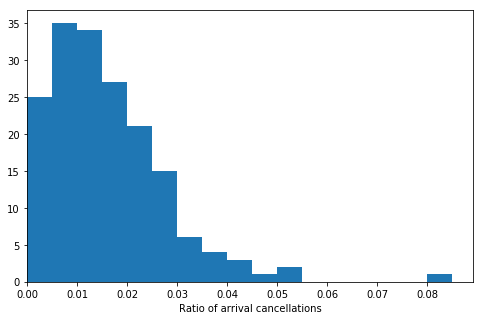

In [376]:
# start with a standard-scaled plot
binsize = 0.005
bins = np.arange(0, df['cancellation_r'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'cancellation_r', bins = bins)
plt.xlabel('Ratio of arrival cancellations')

plt.xlim(0,)

Ratio of arrival cancellation has a left skewed unimodal distribution with the first peak at 1% and second peak at 2% of total arrival flights. There is an edge at 8% which disrupts the distribution. 

> Second variable of interest: Diverted flights ratio

In [280]:
df['diverted_r'].describe()

count    59.000000
mean      0.002400
std       0.000734
min       0.000775
25%       0.001965
50%       0.002423
75%       0.002845
max       0.004754
Name: diverted_r, dtype: float64

[0.00225] 28.0


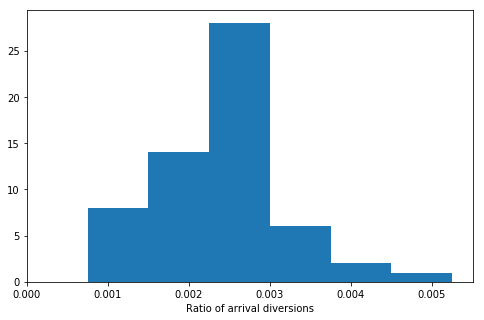

In [290]:
# start with a standard-scaled plot
binsize = 0.00075
bins = np.arange(0, df['diverted_r'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
y,x,_ = plt.hist(data = df, x = 'diverted_r', bins = bins)

plt.xlim(0,)

plt.xlabel('Ratio of arrival diversions')

print(x[np.where(y == y.max())],y.max())



Diverted arrival flights ratio is a left skewed unimodal distribution. The peak is at 0.2%. 

> Third variable of interest: Carrier Arrival Delays flights ratio

In [292]:
df['cdelayed_r'].describe()

count    59.000000
mean      0.051989
std       0.013518
min       0.028949
25%       0.041402
50%       0.049549
75%       0.059420
max       0.087476
Name: cdelayed_r, dtype: float64

[0.035] 14.0


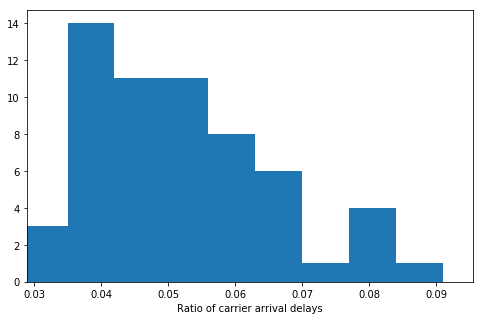

In [302]:
# start with a standard-scaled plot
binsize = 0.007
bins = np.arange(0, df['cdelayed_r'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
y,x,_ = plt.hist(data = df, x = 'cdelayed_r', bins = bins)

plt.xlim(df['cdelayed_r'].min(),)

plt.xlabel('Ratio of carrier arrival delays')

print(x[np.where(y == y.max())],y.max())

Carrier Arrival Delays ratio looks like a right side skewed edge peak modal distribution with the first peak appearing at 3.5% and an edge peak at 7.8%. Based on our previous two univariate graphs of diverted and cancelled flights, carrier arrival delay looks like is a more serious problem with the flight delays. 

> Last variable of interest: Average Number of minutes of Carrier delay by minute per year.(cdelayed_min_avg)

In [378]:
df['cdelayed_min_avg'].describe()

count    174.000000
mean      63.939737
std       14.804412
min       40.416572
25%       54.229940
50%       62.197508
75%       69.863913
max      118.511944
Name: cdelayed_min_avg, dtype: float64

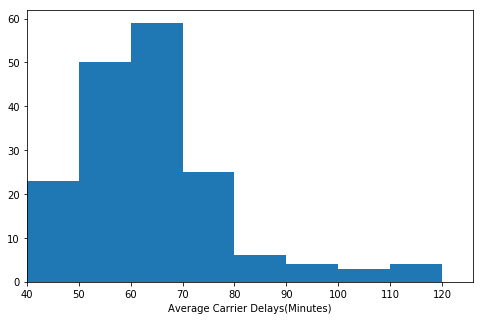

In [381]:
# let's plot the variable distribution.

binsize = 10
bins = np.arange(0, df['cdelayed_min_avg'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'cdelayed_min_avg', bins = bins)
plt.xlabel('Average Carrier Delays(Minutes)')

plt.xlim(40,)

plt.show()


The average carrier delay(min) distribution has a long tail. It requires a transformation. I will do a cuberoot transformation. 

In [442]:
cbrt_trans(df.cdelayed_min_avg).describe()

count    174.000000
mean       3.977518
std        0.289082
min        3.431783
25%        3.785120
50%        3.962090
75%        4.118612
max        4.911951
Name: cdelayed_min_avg, dtype: float64

[59.319] 34.0


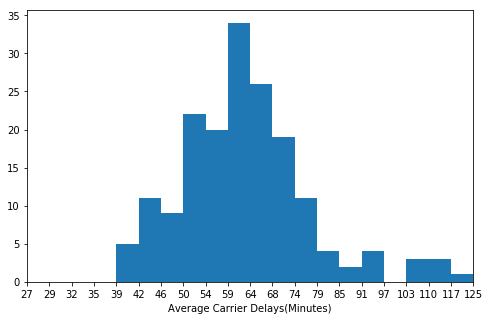

In [450]:
#As we see another long tail distribution. We plot a scaled distribution using cusberoot function. 

plt.figure(figsize=[8, 5])

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, cbrt_trans(df['cdelayed_min_avg'].max())+0.4, 0.1)

# Plot the scaled data
y, x, _ =plt.hist(df['cdelayed_min_avg'].apply(cbrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, cbrt_trans(df['cdelayed_min_avg'].max())+0.4, 0.1)

# Apply x-ticks
plt.xticks(tick_locs, cbrt_trans(tick_locs, inverse = True).astype(int))

plt.xlim(3,5)

plt.gca().xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.xlabel('Average Carrier Delays(Minutes)')

print(cbrt_trans(x, inverse = True)[np.where(y == y.max())],y.max())
    
plt.show()

The Average Carrier Delays(Minutes) is an edge peak distribution. The  peak ist at 59 minutes.An edge peak of 103 minutes is the disrupts the distribution. 

> Next we will look at Total Flight Arrivals : flights_agg

In [20]:
df.flights_agg.describe()

count    1.740000e+02
mean     3.966582e+05
std      3.232133e+05
min      1.767000e+04
25%      1.475848e+05
50%      2.929220e+05
75%      5.505905e+05
max      1.363946e+06
Name: flights_agg, dtype: float64

As the Flight aggregations are really huge numbers, it will be easier to plot them on a log scale distribution.

In [21]:
np.log10(df.flights_agg).describe()

count    174.000000
mean       5.446045
std        0.385653
min        4.247237
25%        5.169041
50%        5.466752
75%        5.740827
max        6.134797
Name: flights_agg, dtype: float64

[194026.21720262] 26.0


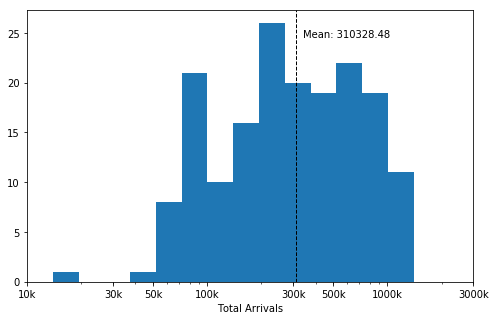

In [56]:
# let's plot the variable distribution.

log_binsize = (np.log10(df['flights_agg'].max())-np.log10(df['flights_agg'].min()))/np.sqrt(df['flights_agg'].shape[0])

bins = 10 ** np.arange(4, np.log10(df['flights_agg'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
y,x,_ = plt.hist(data = df, x = 'flights_agg', bins = bins)

plt.xscale('log')
plt.xticks([1e4, 3e4, 5e4, 1e5,3e5, 5e5, 1e6,3e6], ['10k', '30k','50k','100k','300k','500k','1000k','3000k'])
plt.xlabel('Total Arrivals')

plt.xlim(1e4,)

print(x[np.where(y == y.max())],y.max())

plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

plt.show()


The distribution of total arrivals looks rightly skewed multimodal distribution with highest peak at 194k, another smaller peak at 80k. There is also a peak at 600k and an edge peak at 15k arrivals. This variable is not useful for us to understand the performance of a carrier so we will not use it in the next sections.

> Finally we will look at our qualitative variable : Carrier Name

Text(0,0.5,'Carrier Name')

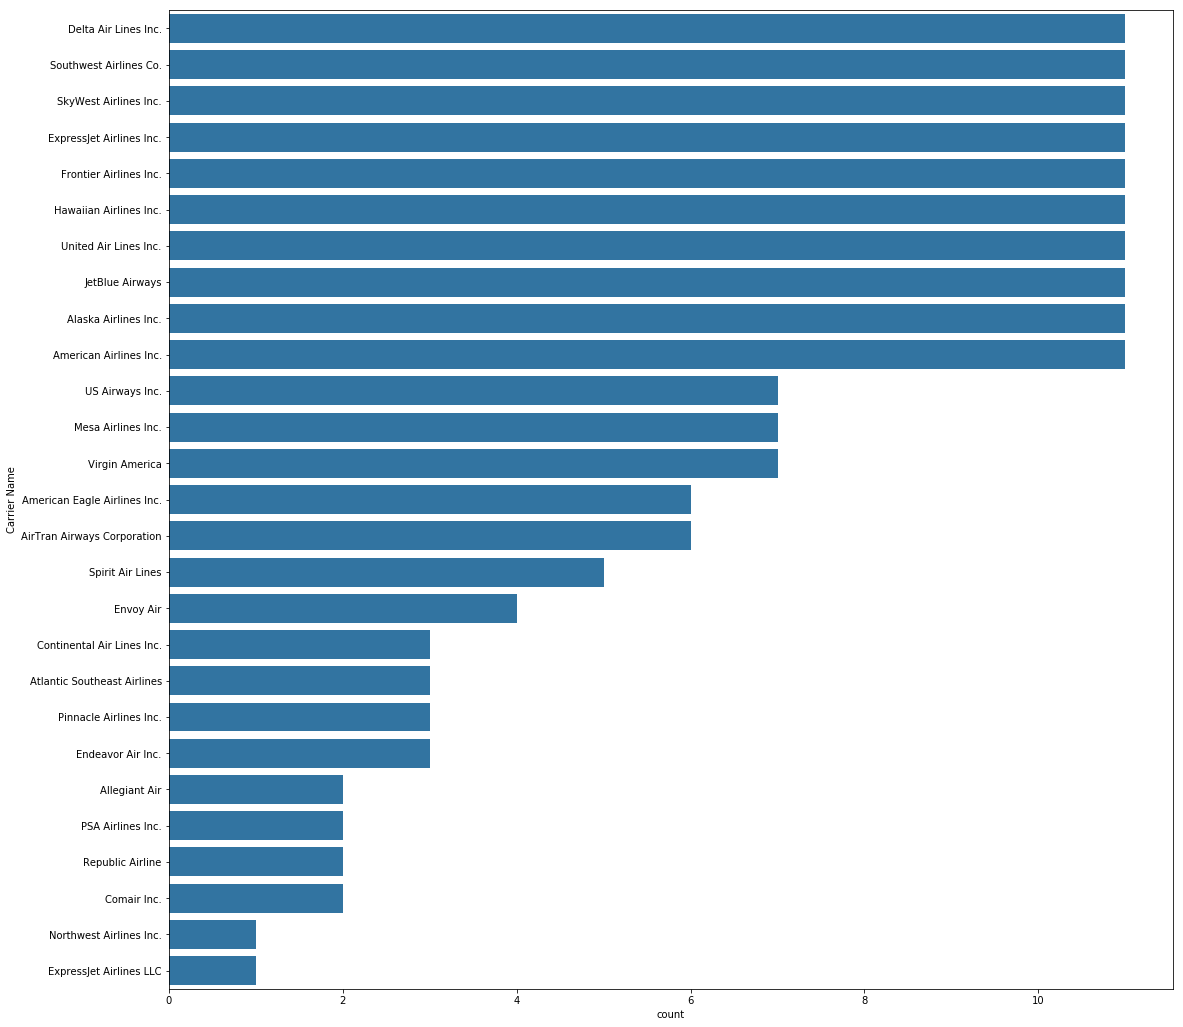

In [453]:
plt.figure(figsize=[18, 18])

index = df.carrier_name.value_counts().index

sb.countplot(data = df, y = 'carrier_name', color = base_color, order=index)

plt.ylabel('Carrier Name')

The uneven distribution of the carrier names suggests that not all carriers flew every year. The top 10 carriers flew all 10 years. However, carrier like ExpressJet Airlines LLC flew only one year out of 10 years. For an airline's overall performance, we need to understand per year carrier arrivals. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The numerical variables were initially normalized with a ratio transformation. As it was observed not all airlines flew all 10 years. Carrier arrival delays seemed to be the most affected problem followed by flight cancellations and finally flight diversions. Carrier delays (in minutes) was roughly unimodal with most of the airlines having an average delay of 59min.  

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During analysis it was observed that not all carriers flew all year round and thus each carrier had different number of flight arrivals. The data was also seperated by per month basis. However, we were interested in yearly analysis. The data was thus merged together based on year and carrier name into a new dataframe df. Every quantitative cariable was added together. To avoid the bias, that carriers with highest number of flight arrivals had the highest problems, the quantitative fields were converted into ratios that could be easy to compare on an equal scale. 

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in your
data. 

Understand if some problems were more accute in some years : 
1. Year vs Arrival Cancellations Ratio
2. Year vs Arrival Diversions Ratio
3. Year vs Carrier Delays Ratio
4. Year vs Total Flight Arrivals

Understand how which carrier flew in the years (2009-2019): 
4. Carrier vs Year

Understand if carrrier delays have a relationship with average carrier delay minutes
5. Carrier Delays vs Average Carrier delay in minutes

Cancellations, Diversions and Delays are independent actions. I do not expect anz relationship between them. 

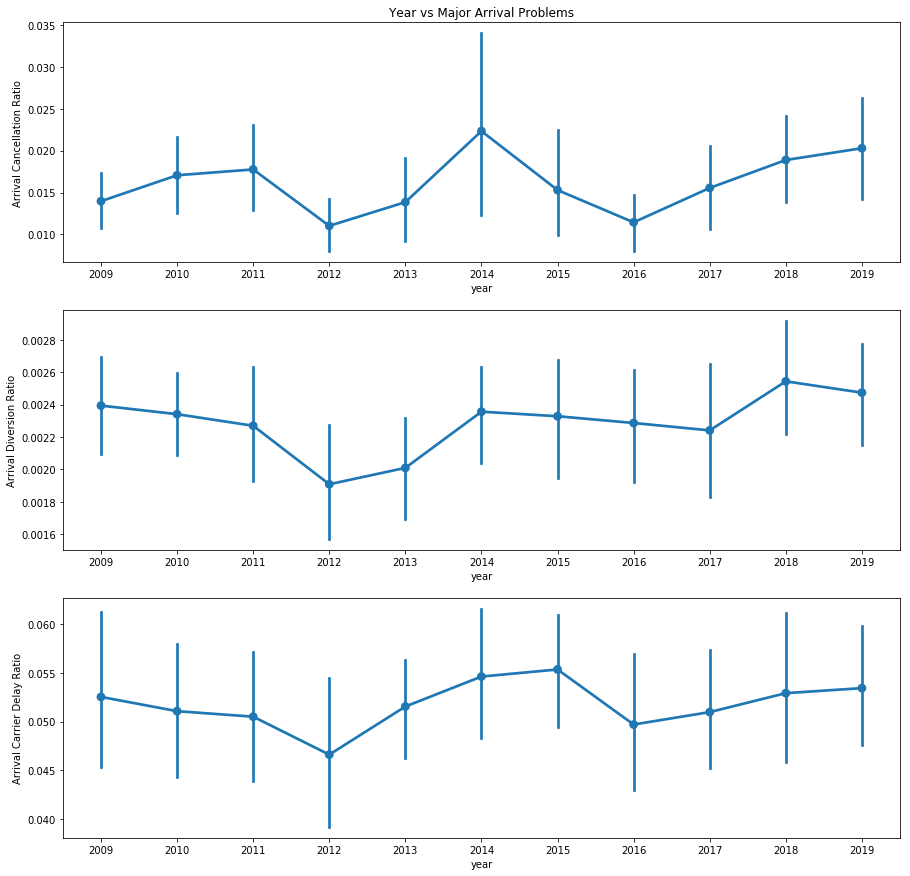

In [136]:
# plot matrix of arrival issues against year.
fig, ax = plt.subplots(nrows=3, figsize = [15,15])

plt1 = sb.pointplot(data = df, x = 'year', y='cancellation_r', color = base_color, ax = ax[0],linestyles='-')
plt1.set_ylabel('Arrival Cancellation Ratio')
plt1.set_title('Year vs Major Arrival Problems')


plt2=sb.pointplot(data = df, x = 'year',  y='diverted_r', color = base_color, ax = ax[1],linestyles='-')
plt2.set_ylabel('Arrival Diversion Ratio')

plt3=sb.pointplot(data = df, x = 'year',  y='cdelayed_r', color = base_color, ax = ax[2],linestyles='-')
plt3.set_ylabel('Arrival Carrier Delay Ratio')

plt.show()

**Year vs Arrival Cancellations**

Arrival cancellation looks highest in 2014 and lowest in 2012. In 2014, the cancellation ratio seems to vary the most. From 2016, the carrier cancellation problem seems to be on a rise. However, looking at the previous pattern, it seems to follow regular cycles.

**Year vs Arrival Diversions**

Arrival diversion looks highest in 2018 and lowest in 2012.

**Year vs Carrier Delays**

Carrier Delays looks highest in 2015 and lowest in 2012. In 2012, the cancellation ratio seems to vary the most,even matching with the average highest carrier delay in 2015. From 2016, the carrier delay problem seems to be on a rise. 

Overall we can say that 2012, there were least airline problems than other years. 

> Let us look which carriers were available over the years (2009 to 2019)

<Figure size 864x864 with 0 Axes>

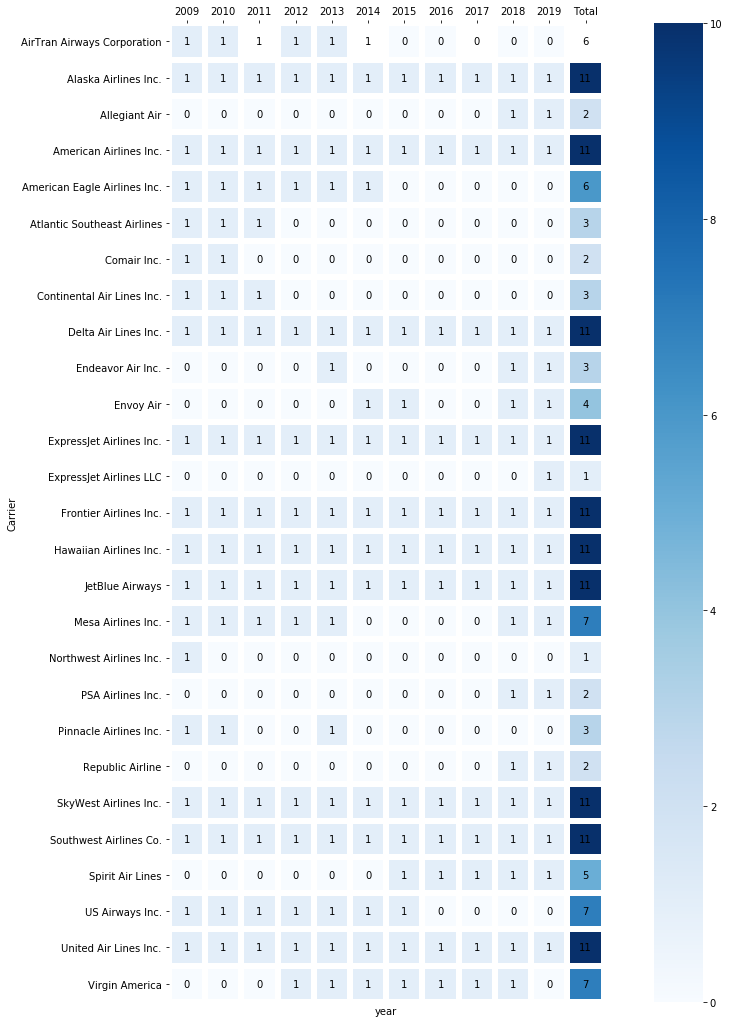

In [24]:
plt.figure(figsize=[12, 12])

ct_counts = df.groupby(['carrier_name', 'year']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

res = ct_counts.pivot(index='carrier_name', columns='year', values='count')

res = pd.DataFrame(res.fillna(0))

res['Total'] = res[2009] + res[2010] + res[2011] + res[2012] + res[2013] + res[2014] + res[2015] + res[2016] + res[2017] + res[2018] + res[2019]

fig, ax = plt.subplots(1, 1, figsize =(18,18))

sb.heatmap(res, annot=True, linewidths=5, cbar=True,square=True, cmap="Blues", center=5, vmax=10,vmin=0)

# find your QuadMesh object and get array of colors
quadmesh = ax.findobj(QuadMesh)[0]
facecolors = quadmesh.get_facecolors()

# make colors of the last column white
facecolors[np.arange(2,12,3)] = np.array([1,1,1,1])

# set modified colors
quadmesh.set_facecolors = facecolors

# set color of all text to black
for i in ax.findobj(Text):
    i.set_color('black')

# move x ticks and label to the top
ax.xaxis.tick_top()
ax.set_ylabel('Carrier')
ax.xaxis.set_label_position('bottom') 

plt.show()

From the above heat map, we can see that carrier arrivals per year. 

We see 3 major subsets of airlines:
1. Subset A: Airlines flying for all 8+ years
2. Subset B: Airlines flying for 3 to 7 years
3. Subset C: Airlines flying for less than 3 years

For further analysis on performance, we will select airlines from subset A

In [76]:
#creation of subset A
subset_a = res.query('Total >= 8').index
subset_a=np.array(subset_a)

> Finally, let us look at the co-relation between Carrier Delay Average Minutes and Carrier Delay Ratio




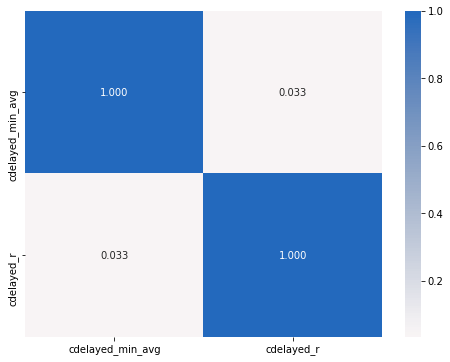

In [148]:
# Corelation matrix of carrier delay time and carrier delay ratio

plt.figure(figsize = [8, 6])

sb.heatmap(df[['cdelayed_min_avg','cdelayed_r']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

There is weak positive linear co-relation between the Average Carrier Delays Minutes and Carrier Delay Ratio. We will plot a scatter map and see the relationship.

Text(0,0.5,'Average Carrier Delay minutes')

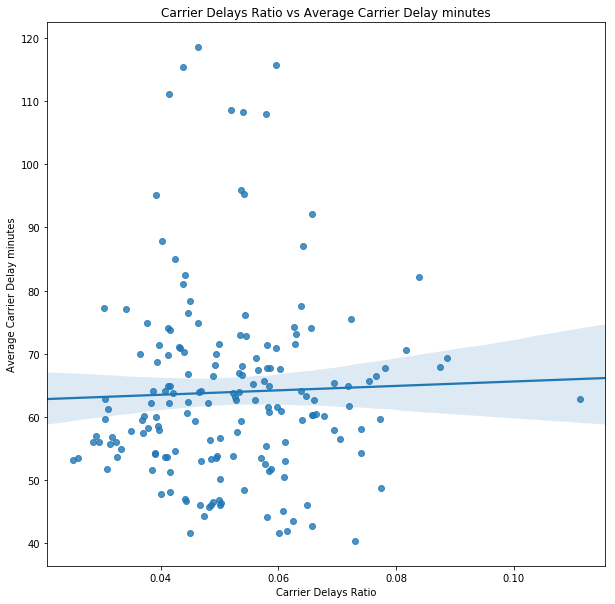

In [138]:
# plot matrix
plt.figure(figsize=[10, 10])

sb.regplot(data=df,x='cdelayed_r',y='cdelayed_min_avg')

plt.title('Carrier Delays Ratio vs Average Carrier Delay minutes')

plt.xlabel('Carrier Delays Ratio')

plt.ylabel('Average Carrier Delay minutes')

We cannot see any clear relationship between the number of carrier delays and average minutes of carrier delays. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I extended my investigation of carrier performance indicators (cancellation, diversions, carrier delay) in this section by looking at the impact of the three quantitative ratios against years. The bivariate exploration here showed that there is no relationship between average delay minutes and number of times carrier delays were observed. I was able to group carriers into three subsets based on which years they had arrivals which will help further investigation. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was expecting that the carrier delay ratio and carrier delay minutes will be co-related, however, this was not true. 2012 was the best performing year based on least number of problems. However, problems with flight cancellations and carrier delays seem to be on rise from 2016 onwards.

## Multivariate Exploration

> For the multivariate exploration we will check the following relationsips:
1. Carrier vs Year vs (Carrier Delays , Carrier Cancellations, Carrier Deviations) 
2. Carrier vs Year vs (Average Carrier Delay Time)

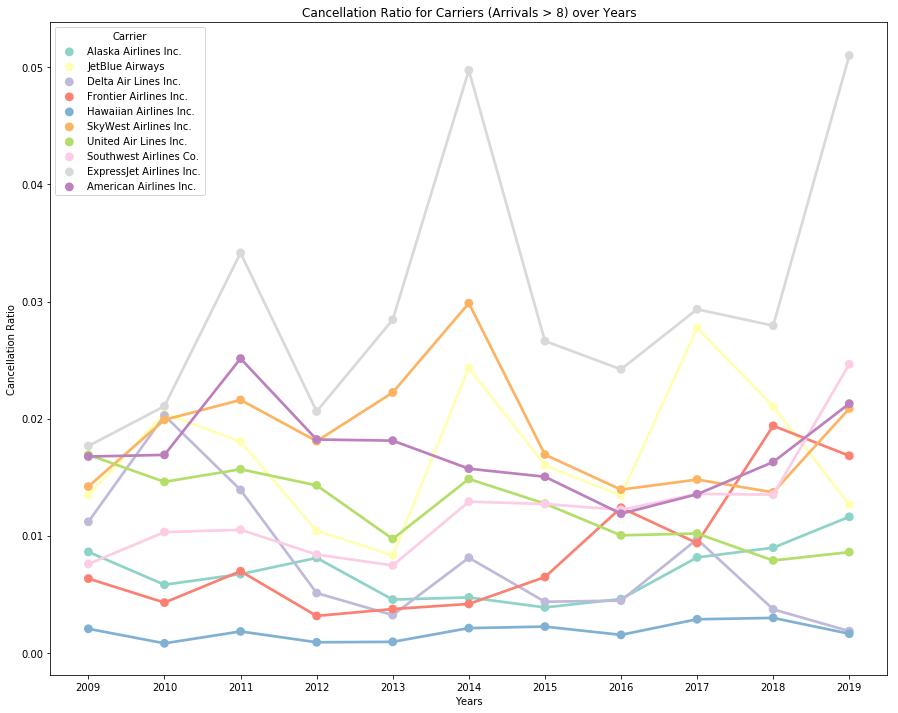

In [145]:
plt.figure(figsize=[15, 12])

df_a=df[df.carrier_name.isin(subset_a)]

sb.pointplot(data=df_a,x='year',y='cancellation_r',errwidth=False,hue='carrier_name',palette='Set3')

plt.title('Cancellation Ratio for Carriers (Arrivals > 8) over Years')

plt.xlabel('Years')

plt.ylabel('Cancellation Ratio')

plt.legend(title='Carrier',loc='upper left')

Hawaiian airlines shows very consistent lowest cancellation ratio for last 10 years. On the other side, Delta Air Lines has the highest cancellation ratio of all time. United Air Lines have dreduced their carrier cancellation from 2014 and managed to keep it low. From 2011 to 2016, American airlines really dropped their cancellation ratio, however, from 2016 their carrier cancellations are on a rise.

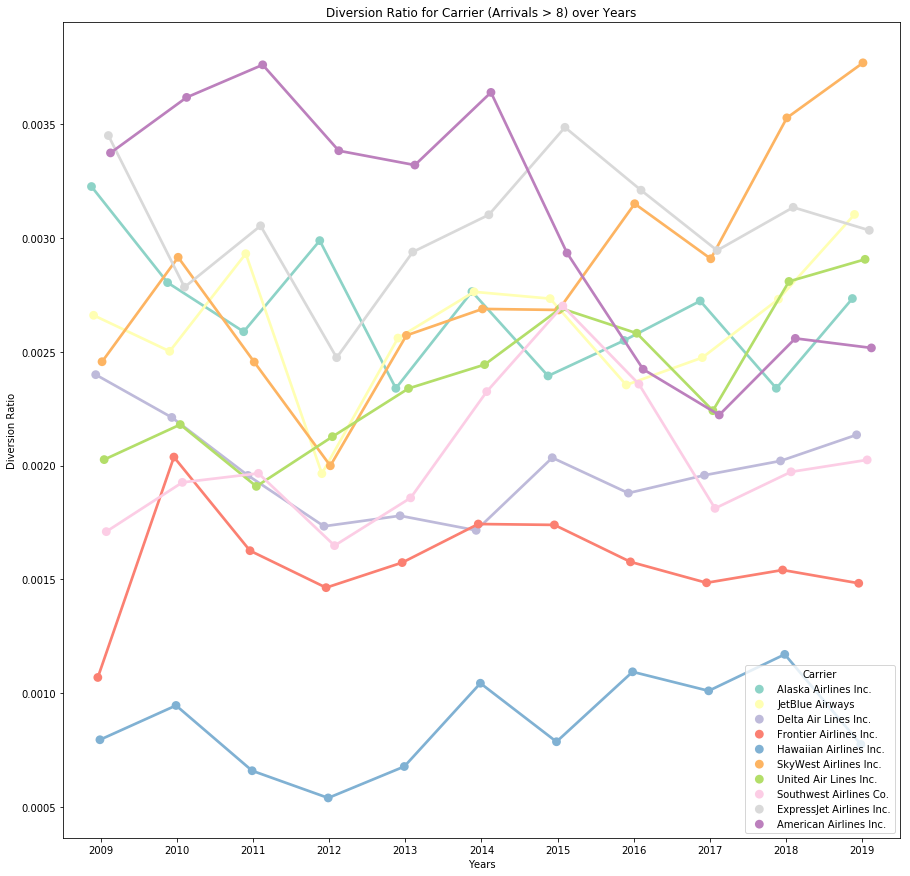

In [144]:
plt.figure(figsize=[15, 15])

df_a=df[df.carrier_name.isin(subset_a)]

sb.pointplot(data=df_a,x='year',y='diverted_r',errwidth=False,hue='carrier_name',dodge=True,palette='Set3')

plt.title('Diversion Ratio for Carrier (Arrivals > 8) over Years')

plt.xlabel('Years')

plt.ylabel('Diversion Ratio')

plt.legend(title='Carrier',loc='lower right')

Once more, we observe Hawaiian airlines has lowest carrier diversion. Frontier Airlines has the second all time lowest carrier diversion, however, there is the huge gap between Frontier and Hawaiin airlines, showing they have a lot to catch-up. Although American Airlines, was performing worst from 2009 till 2014, they significantly managed to drop their flight diversions from 2015. SkyWest Airlines show an alarming flight diversion rate from 2012, making it divering the most in 2019 in comparison with other carriers.

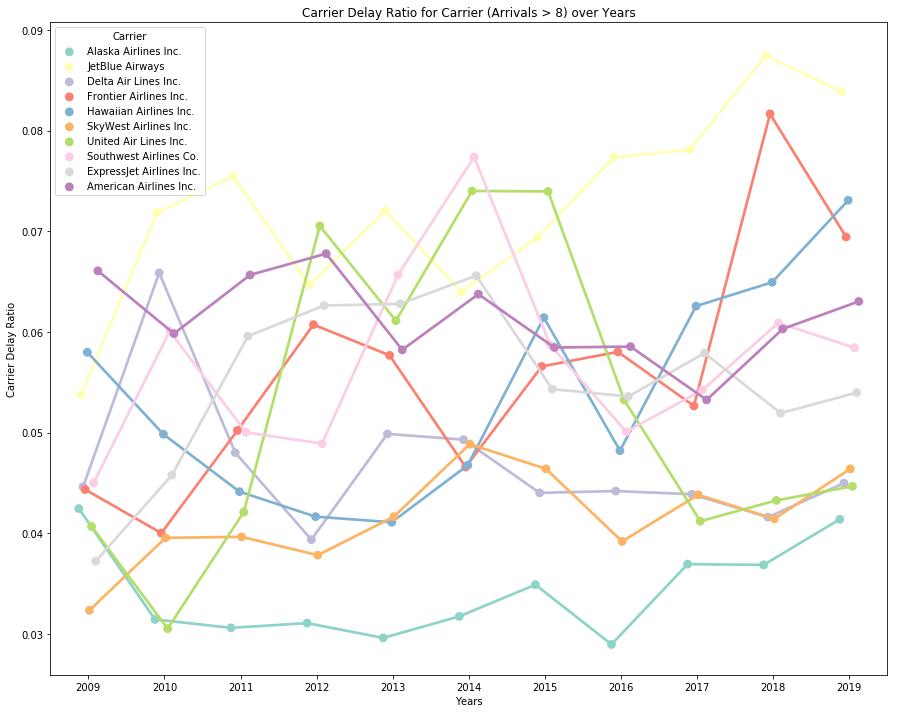

In [147]:
plt.figure(figsize=[15, 12])

df_a=df[df.carrier_name.isin(subset_a)]
sb.pointplot(data=df_a,x='year',y='cdelayed_r',errwidth=False,hue='carrier_name',dodge=True,palette='Set3')

plt.title('Carrier Delay Ratio for Carrier (Arrivals > 8) over Years')

plt.xlabel('Years')

plt.ylabel('Carrier Delay Ratio')

plt.legend(title='Carrier',loc='upper left')

Alaskan Airlines has lowest carrier delays since 2010.JetBlue Airwys shows a rising trend inc arrier delays since 2014. Delta Airlines was worst in year 2010 , however since then they have largely dropped their carrier delays and managed to them below 5% for all their carrier flights. Surprisingly, Hawaiian Airlines which had least cancellations and diversions, shows a rise in carrier delays from 2013 with a short fall in 2016 but rising since then. 

> Let us see which carriers have highest and lowest carrier delays over the years 



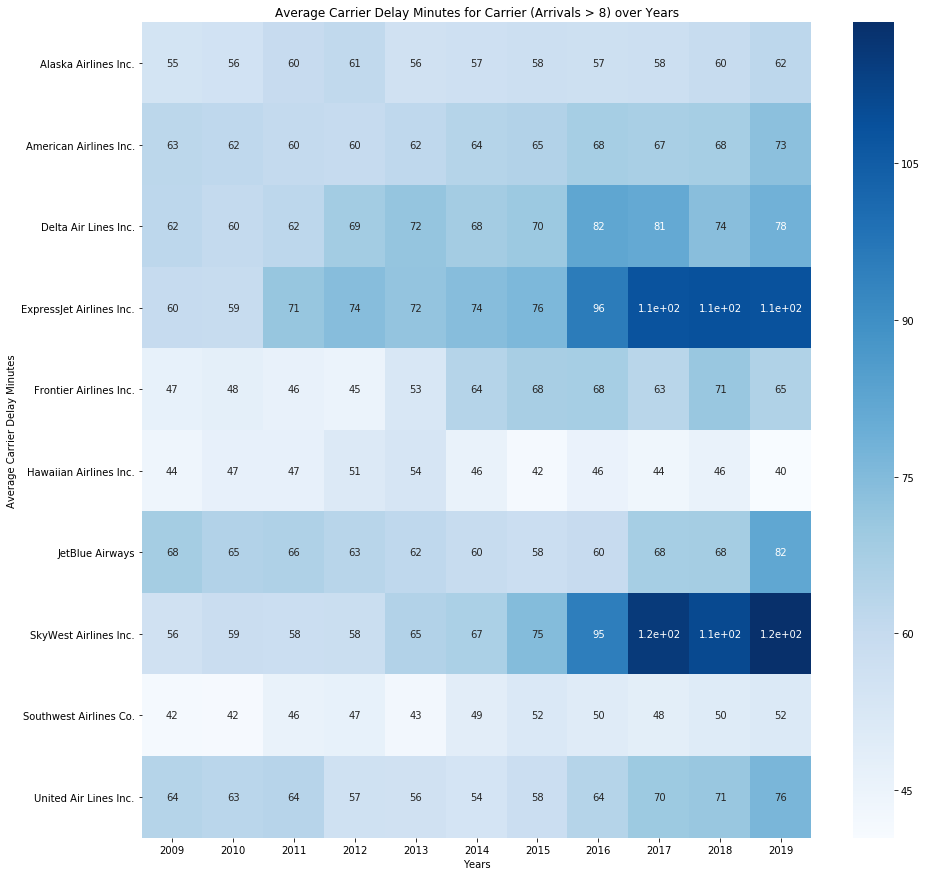

In [119]:
plt.figure(figsize=[15, 15])

#Create a pivot to plot a heat map
df_a=df[df.carrier_name.isin(subset_a)]
df_a = df_a[["carrier_name","year","cdelayed_min_avg"]]
data_pivoted = df_a.pivot("carrier_name","year","cdelayed_min_avg")
ax = sb.heatmap(data_pivoted, annot=True,cmap="Blues")

plt.title('Average Carrier Delay Minutes for Carrier (Arrivals > 8) over Years')

plt.xlabel('Years')

plt.ylabel('Average Carrier Delay Minutes')

plt.show()

Although Skywest has very low number of carrier delays, from 2012(58min) they show rising average carrier delays minutes per year,almost 122min in 2019. From 2009 to 2014, ExpressJet Airlines showed another exponential rise in average carrier minutes from 2010(59min) to 112min in 2019. This is also reflected by the number of carrier delays of ExpressJet. Hawaiin Airlines and Southwest airlines have consistently maintained comparatively low average carrier minutes (less than 54min). 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the multivariate plots, it was clear that carrier delays and carrier delay minutes show no co-relation. 

### Were there any interesting or surprising interactions between features?

> Hawaiin Airlines and Frontier Airlines showed consistently lowest carrier delay minutes, but apparently more number of carrier delays. Alaska airlines had lowest carrier delays but fairly higher carrier minutes around 60min. From a performance point of view, we can say the following airlines showed a fairly high performance 

Research Question: Which carrier(s) has shown consistently good performance with respect to carrier delay,arrival diversions, arrival cancellations for 10 years (2009 to 2019)?
<ul>
    <li>All time Lowest Average Carrier Delay Minutes: Hawaiian Airlines</li>
    <li>All time Lowest Number of Carrier Delays: Alaska Airlines</li>
    <li>All time Lowest Cancellation Ratio: Hawaiian Airlines</li>
    <li>All time Lowest Diversion Ratio: Hawaiian Airlines</li>    
</ul>

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!